In [1]:
import pandas as pd

titanic_df = pd.read_csv("Titanic_data.csv")

## DataFrame Exploration

### Base Information

In [2]:
titanic_df.shape # Number of rows and columns

(891, 12)

In [3]:
titanic_df.columns # Name of Columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Specific Information

**dataframe.describe()**

In [7]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

* Average age is 27 , which suggest most of the passengers are young people.
* Mean and median are nearly equal, suggesting a symmetrical distribution.

In [8]:
titanic_df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**dataframe.value_counts()**

In [9]:
titanic_df.value_counts("Sex", normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

This suggest a larger number of males aboard the ship than female.

In [10]:
titanic_df.value_counts('Survived', normalize=True, ascending=True)

Survived
1    0.383838
0    0.616162
Name: proportion, dtype: float64

In [11]:
titanic_df[titanic_df.Sex == "male"].value_counts(
    "Survived", normalize=True
)

Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64

In [12]:
titanic_df.value_counts(["Sex", "Survived"], normalize=True)

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
Name: proportion, dtype: float64

 ...

**dataframe.nunique()**

**dataframe.unique()**

In [13]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
titanic_df.Embarked.nunique(dropna = False)

4

In [15]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
even_dataset = titanic_df.loc[::2,]
even_dataset[even_dataset.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## DataFrame.groupby(by = ?)

In [17]:
group_by_sex = titanic_df[["Sex","Fare"]].groupby(
    by= "Sex"
)

In [25]:
group_by_sex.mean()

,Fare
Sex,
female,44.479818
male,25.523893


In [19]:
group_by_embarked =  titanic_df[["Embarked","Fare", "Age"]].groupby(
    by= "Embarked"
)

In [20]:
group_by_embarked.sum()

,Fare,Age
Embarked,,
C,10072.2962,4005.92
Q,1022.2543,786.50
S,17439.3988,16312.75


In [21]:
group_by_embarked.mean()

,Fare,Age
Embarked,,
C,59.954144,30.814769
Q,13.276030,28.089286
S,27.079812,29.445397


### Correlation

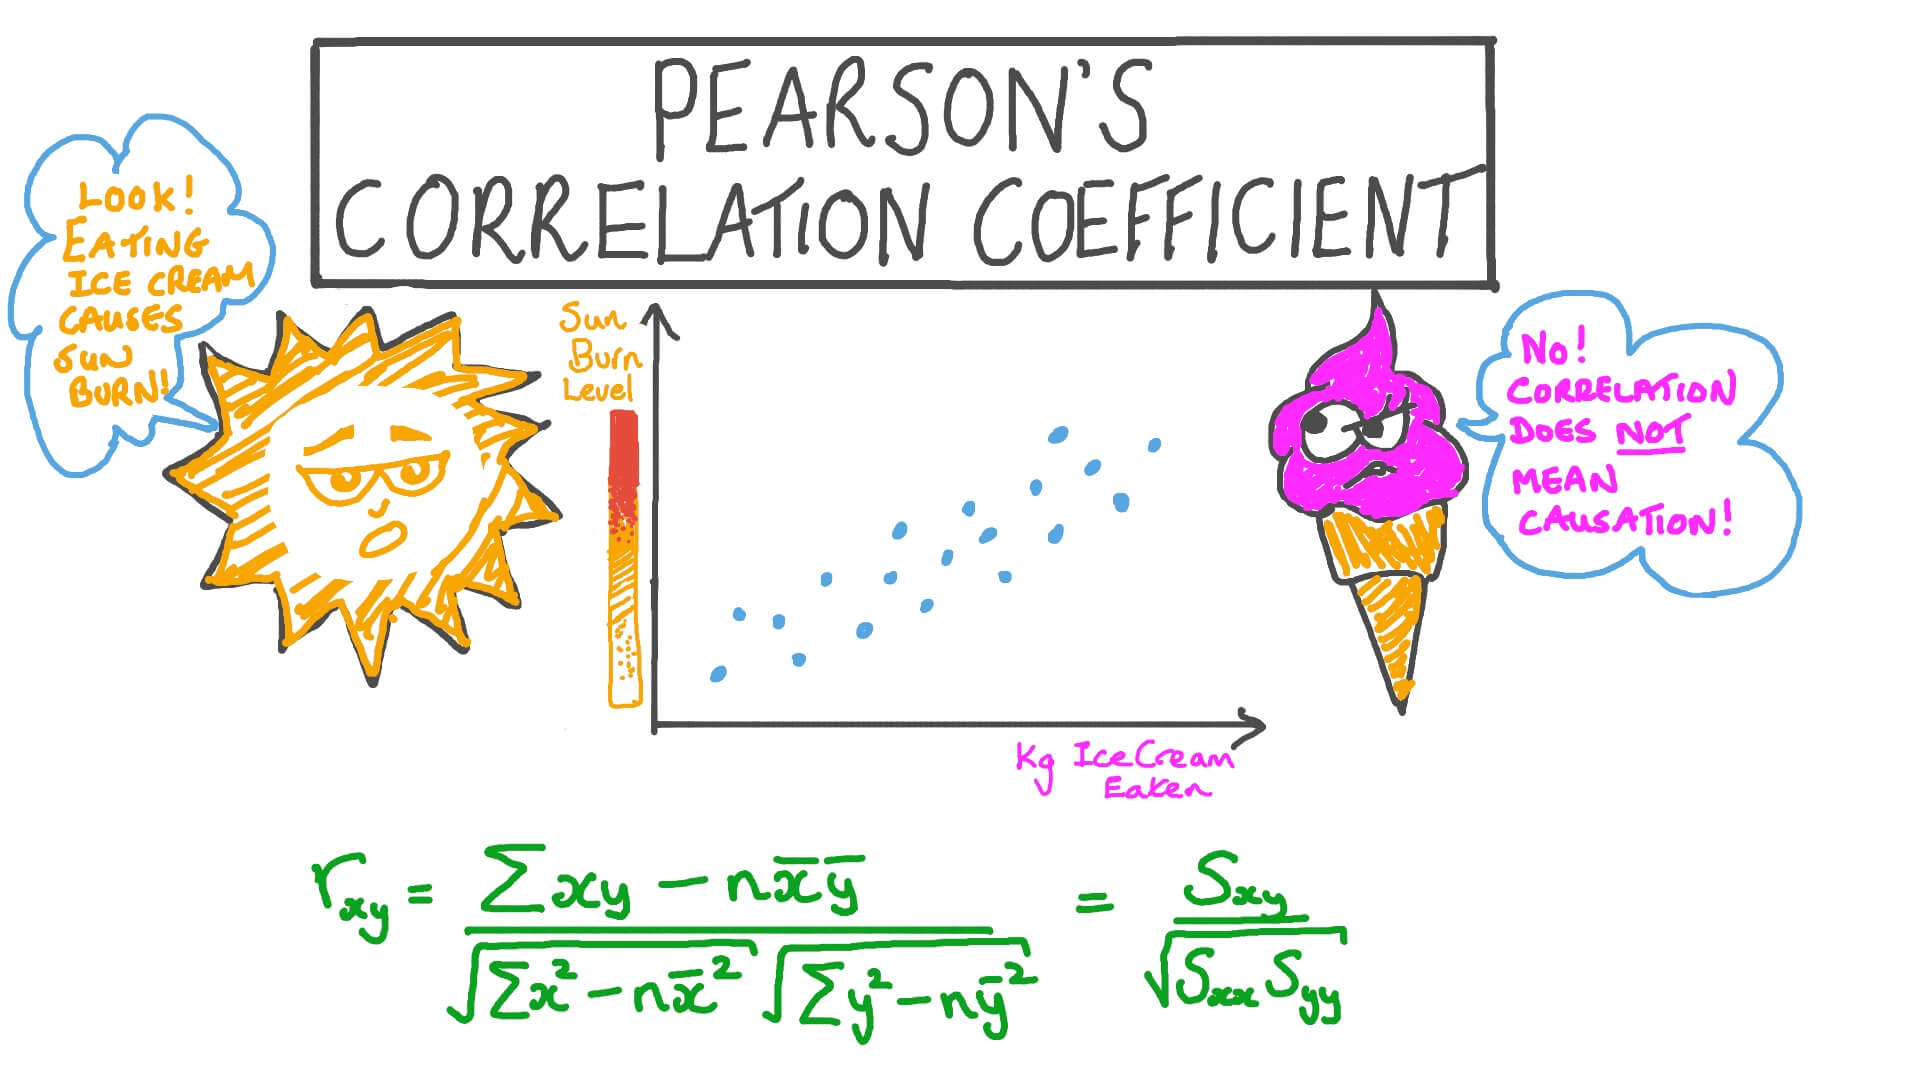

In [22]:
titanic_df[["Age","Fare"]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


### sample()

In [23]:
titanic_df.sample(frac = 0.1, random_state=99)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
